# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<div class="span5 alert alert-info">
<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****
</div>

In [1]:
import pandas as pd

df = pd.read_csv('data/human_body_temperature.csv')

df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


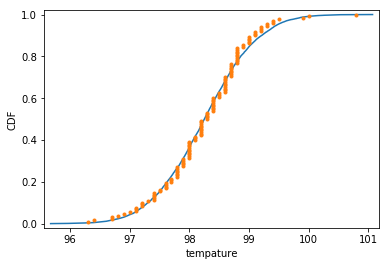

In [2]:
# Your work here.


import matplotlib.pyplot as plt
import numpy as np

def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""

    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1.0,n+1) / n
    
    return x, y


mu = np.mean(df.temperature)
sigma = np.std(df.temperature)


# Sample out of a normal distribution with this mu and sigma: samples
samples = np.random.normal(mu, sigma, 10000)

# Get the CDF of the samples and of the data
x, y = ecdf(df.temperature)
x_theor, y_theor = ecdf(samples)

# Plot the CDFs and show the plot
_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x, y, marker='.', linestyle='none')
plt.margins(0.02)
_ = plt.xlabel('tempature')
_ = plt.ylabel('CDF')
plt.show()


1.The data is close to normal distributed

In [3]:
print df.shape

(130, 3)


2.A dataset containing 130 samples is large enough for a z-test. Also, assuming the data is collected from different people, the samples are independent. 

In [4]:
import scipy.stats as stats

z = (np.mean(df.temperature) - 98.6)*np.sqrt(df.shape[0])/np.std(df.temperature)

print 'z value:',z
print 'p value:',stats.norm.cdf(z)

print 'p value from t test', stats.t.sf(np.abs(z), df.shape[0]-1)*2 

z value: -5.47592520208
p value: 2.17615758294e-08
p value from t test 2.18874646241e-07


In [5]:
import numpy as np

mean_diff = np.mean(df.temperature) - 98.6

tempature_shifted = df.temperature - np.mean(df.temperature) + 98.6

tempature_conc = np.concatenate((df.temperature, tempature_shifted))

difference = np.empty(100000)

for i in range(100000):

    bs_tempature = np.random.permutation(tempature_conc)

    bs_tempature_o = bs_tempature[:len(df.temperature)]
    bs_tempature_shifted = bs_tempature[len(df.temperature):]
    
    difference[i] = np.mean(bs_tempature_o) - np.mean(bs_tempature_shifted)

print "p:", np.sum(difference<mean_diff)/len(difference)
print "difference:", mean_diff

p: 0
difference: -0.350769230769


3.One sample test; z-test, because sample size is larger than 30 and it seemsthe data has a nice normal distribution. The p value is too small to indicate the mean at 98.6, so no, the real value is not 98.6

In [6]:
tempature_mean = np.mean(df.temperature)

bs_mean = np.empty(100000)

for i in range(100000):
    bs_tempature = np.random.choice(df.temperature, size = len(df.temperature))
    bs_mean[i] = np.mean(bs_tempature)
    
print 'mean, ', tempature_mean
print '95% interval, ', np.percentile(bs_mean, [2.5, 97.5])


mean,  98.2492307692
95% interval,  [ 98.12461538  98.37538462]


4.The body tempature is abnormal if the read is outside of the interval [ 98.12384615  98.37461538].

In [7]:
temp_man = df[df.gender=='M'].temperature
temp_woman = df[df.gender=='F'].temperature

temp_diff = np.mean(temp_man) - np.mean(temp_woman)

difference = np.empty(100000)

tempature_conc = np.concatenate((temp_man, temp_woman))

for i in range(100000):

    bs_tempature = np.random.permutation(tempature_conc)

    bs_temp_man = bs_tempature[:len(temp_man)]
    bs_temp_woman = bs_tempature[len(temp_man):]
    
    difference[i] = np.mean(bs_temp_man) - np.mean(bs_temp_woman)

print "p:", np.sum(difference<temp_diff)/len(difference)
print "difference:", temp_diff

p: 0
difference: -0.289230769231


5.Again, p is so small so that there is a significant difference between males and females in normal temperature.

We find that human tempature is close to normal distributed, we also concluded that although the mean body tempature was thought to be 98.6, this is not true according to the p values test we conducted on the tempature dataset. We then conduct another A/B test to conclude that there is a significant difference between males and females in normal temperature.